In [38]:
#https://www.kaggle.com/saurabhbagchi/credit-card-fraud-detection
import json
import pickle
import os
from os import listdir
import csv 

DATA_PATH= '/Users/gauravtyagi/Downloads/Data/Credit-Card-Fraud/data/'


for file in [DATA_PATH for DATA_PATH in listdir() if DATA_PATH.endswith('pkl')]:
    with open(file, "rb") as fp:
        with open(file.split('.')[0] + ".json", "wt") as fp_json:
            json.dump(pickle.load(fp), fp_json)

In [39]:
data = []
import pandas as pd 

for root, dirs, files, in os.walk(DATA_PATH):
    for file in files:
        if file.endswith(".pkl"):
           #print(DATA_PATH+file)
           loadedcontacts = pickle.load(open(DATA_PATH+file,'rb'))
           data.append(loadedcontacts)
           df = pd.DataFrame(loadedcontacts)
           df.to_csv('/Users/gauravtyagi/Downloads/Data/Credit-Card-Fraud/csv/'+file+'.csv', encoding='utf-8')
           #print(loadedcontacts)




In [40]:
import glob

all_files = glob.glob(os.path.join('/Users/gauravtyagi/Downloads/Data/Credit-Card-Fraud/csv/', "*.csv"))

                                   
df_merged = (pd.read_csv(f, sep=',') for f in all_files)
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "/Users/gauravtyagi/Downloads/Data/Credit-Card-Fraud/csv/data.csv")

In [41]:
credit_data = pd.read_csv("/Users/gauravtyagi/Downloads/Data/Credit-Card-Fraud/csv/data.csv")

In [42]:
credit_data.value_counts()

Unnamed: 0  Unnamed: 0.1  TRANSACTION_ID  TX_DATETIME          CUSTOMER_ID  TERMINAL_ID  TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS  TX_FRAUD  TX_FRAUD_SCENARIO
1754154     642570        642570          2018-06-06 23:58:28  1716         7502         110.04     5788708          66            0         0                    1
584709      1141260       1141260         2018-07-29 03:32:14  1521         3822         98.49      10294334         119           0         0                    1
584711      1141262       1141262         2018-07-29 03:32:35  332          4353         55.41      10294355         119           0         0                    1
584712      1141263       1141263         2018-07-29 03:32:38  3378         8246         9.80       10294358         119           0         0                    1
584713      1141264       1141264         2018-07-29 03:32:56  2274         3777         15.12      10294376         119           0         0                    1
                     

In [45]:
from sklearn.model_selection import train_test_split

X=credit_data
y=credit_data['TX_FRAUD_SCENARIO']

X=X.drop(['TX_FRAUD','TRANSACTION_ID','Unnamed: 0','Unnamed: 0.1','TX_DATETIME','TX_FRAUD_SCENARIO'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X_train.columns

Index(['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS',
       'TX_TIME_DAYS'],
      dtype='object')

In [47]:
y_train.value_counts()

0    1165399
2       6090
3       3137
1        657
Name: TX_FRAUD_SCENARIO, dtype: int64

In [48]:
y_test.value_counts()

0    574075
2      2987
3      1494
1       316
Name: TX_FRAUD_SCENARIO, dtype: int64

In [49]:
X_test.columns

Index(['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS',
       'TX_TIME_DAYS'],
      dtype='object')

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
predict = lr.predict(X_test)

In [73]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np 

In [75]:
print(metrics.mean_absolute_error(predict,y_test))
print(metrics.mean_squared_error(predict,y_test))
print(np.sqrt(metrics.mean_squared_error(predict,y_test)))
print(r2_score(y_test,predict))

0.04913562931923858
0.04239507712646953
0.20590064867908875
0.03795539707614626


In [59]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None)

In [61]:
ls.fit(X_train,y_train)

Lasso()

In [62]:
ls_predict = ls.predict(X_test)

In [76]:
print(metrics.mean_absolute_error(ls_predict,y_test))
print(metrics.mean_squared_error(ls_predict,y_test))
print(np.sqrt(metrics.mean_squared_error(ls_predict,y_test)))
print(r2_score(y_test,ls_predict))

0.03702536309843502
0.04292794325744271
0.20719059645032809
0.025863403851215994


In [65]:
from matplotlib import pyplot

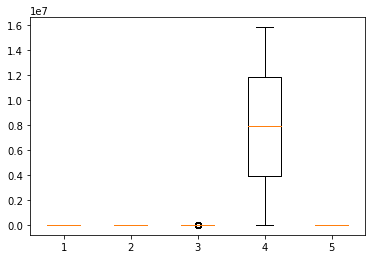

In [69]:
pyplot.boxplot(X_train)
pyplot.show()

<AxesSubplot:>

/Users/gauravtyagi/opt/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


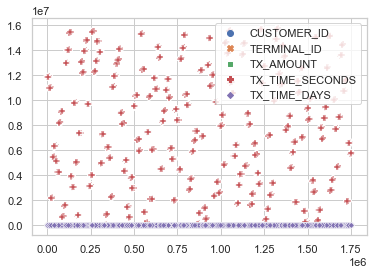

In [71]:
import seaborn
 
 
seaborn.set(style='whitegrid')
 
seaborn.scatterplot(data=X_train)